# 1 Stock Prediction

In [3]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

ModuleNotFoundError: No module named 'keras'

# 2 Load Data

In [2]:
import pandas as pd
data = pd.read_csv("a.us.csv")
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,2017-11-06,68.220,68.450,68.220,68.220,995731,0
4517,2017-11-07,68.320,68.640,68.040,68.250,966466,0
4518,2017-11-08,68.100,68.330,67.771,68.110,972616,0
4519,2017-11-09,67.920,67.980,66.910,67.470,1673083,0


In [3]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,4521.000000,4521.000000,4521.000000,4521.000000,4.521000e+03,4521.0
mean,27.856296,28.270442,27.452486,27.871357,3.993503e+06,0.0
std,12.940880,13.176000,12.711735,12.944389,2.665730e+06,0.0
min,7.223100,7.513900,7.087800,7.323800,0.000000e+00,0.0
25%,19.117000,19.435000,18.780000,19.089000,2.407862e+06,0.0
50%,24.456000,24.809000,24.159000,24.490000,3.460621e+06,0.0
75%,36.502000,37.046000,35.877000,36.521000,4.849809e+06,0.0
max,105.300000,109.370000,97.881000,107.320000,6.627751e+07,0.0


In [3]:
import pandas as pd
data = pd.read_csv("a.us.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4521 non-null   object 
 1   Open     4521 non-null   float64
 2   High     4521 non-null   float64
 3   Low      4521 non-null   float64
 4   Close    4521 non-null   float64
 5   Volume   4521 non-null   int64  
 6   OpenInt  4521 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 247.4+ KB


In [4]:
import pandas as pd
data = pd.read_csv("a.us.csv")
data.shape

(4521, 7)

# 3 Data Processing

In [4]:
data.dropna()
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [13]:
X = data.drop(['Date'],axis=1)
X

,Open,High,Low,Close,Volume,OpenInt
0,30.713,33.754,27.002,29.702,66277506,0
1,28.986,29.027,26.872,27.257,16142920,0
2,27.886,29.702,27.044,29.702,6970266,0
3,28.688,29.446,27.002,27.002,6332082,0
4,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...
4516,68.220,68.450,68.220,68.220,995731,0
4517,68.320,68.640,68.040,68.250,966466,0
4518,68.100,68.330,67.771,68.110,972616,0
4519,67.920,67.980,66.910,67.470,1673083,0


# 4 Stock Price Data

In [2]:
import pandas as pd
data = pd.read_csv("a.us.csv")
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
data = data.filter(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])
data.set_index('Date', inplace=True)
data = data.sort_index(ascending=True, axis=0)
data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1999-11-19,28.986,29.027,26.872,27.257,16142920,0
1999-11-22,27.886,29.702,27.044,29.702,6970266,0
1999-11-23,28.688,29.446,27.002,27.002,6332082,0
1999-11-24,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...
2017-11-06,68.220,68.450,68.220,68.220,995731,0
2017-11-07,68.320,68.640,68.040,68.250,966466,0
2017-11-08,68.100,68.330,67.771,68.110,972616,0


# 5 Correlation Matrix

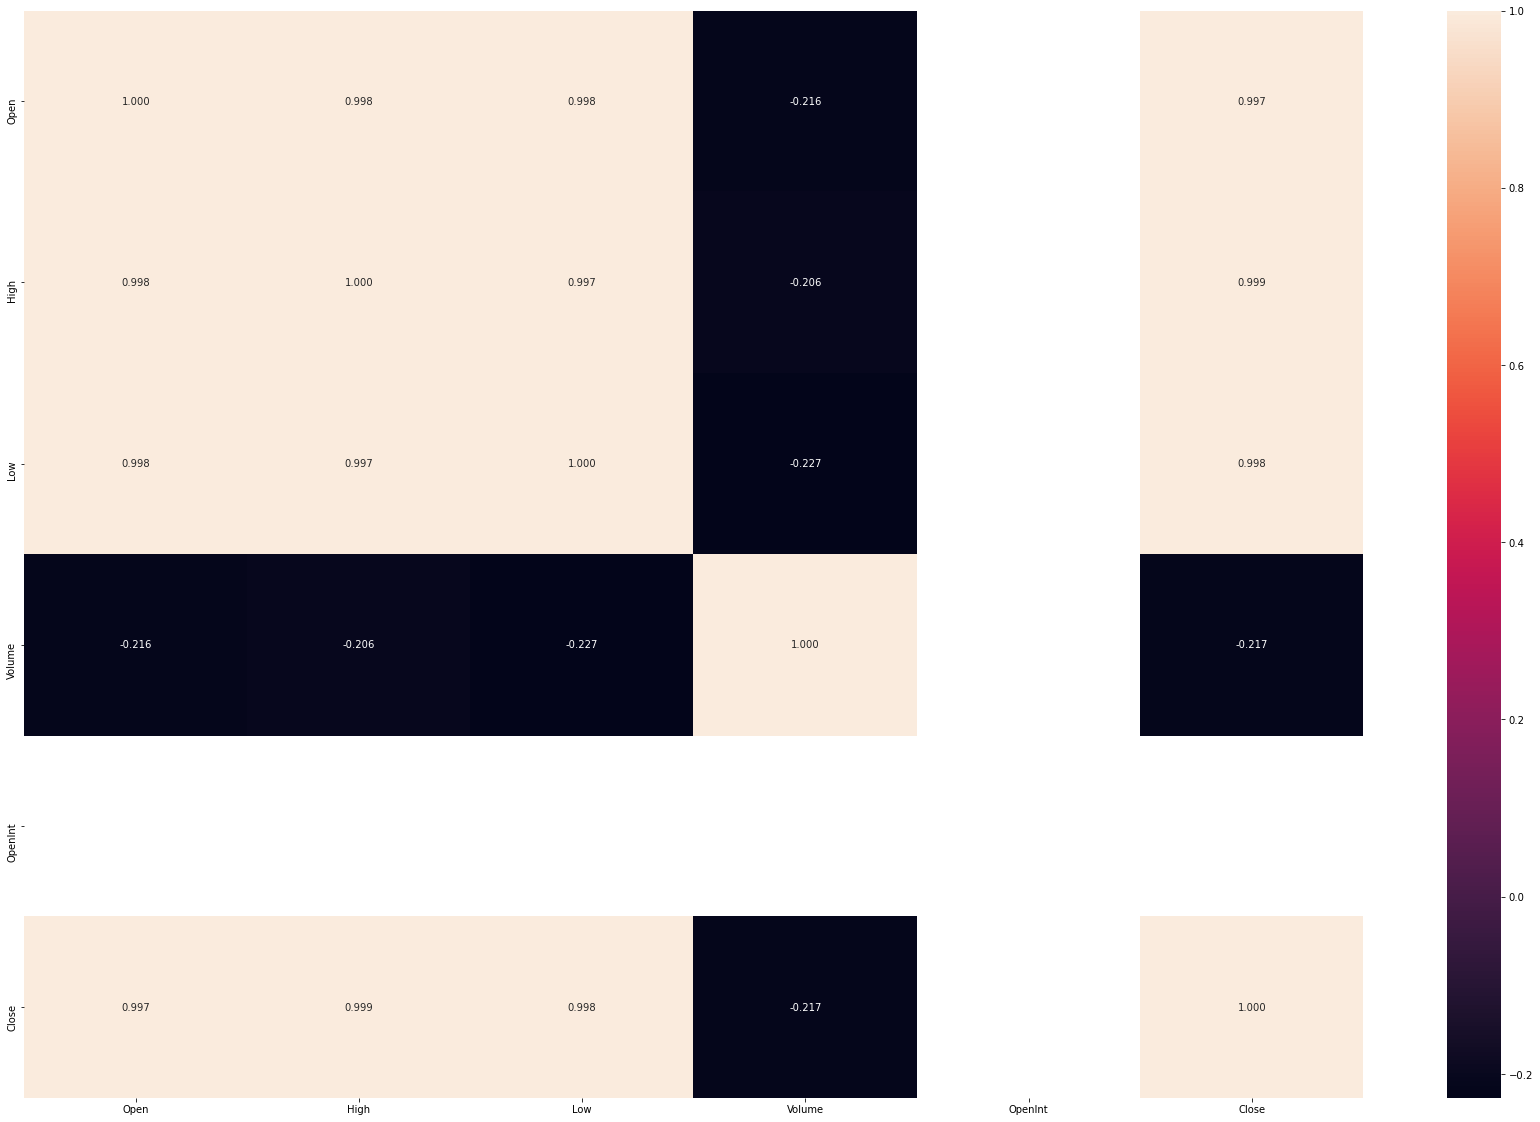

In [5]:
import pandas as pd
data = pd.read_csv("a.us.csv")
y = pd.DataFrame(data.iloc[:,4])
X = data.drop(['Close'],axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
result = pd.concat([X, y], axis=1)
correlation_train=result.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_train, annot=True, fmt='.3f')
plt.show()

# 6 Split data (Test and Train)

In [5]:
#split the data, 70% train and 30% test
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv("a.us.csv")
y = pd.DataFrame(data.iloc[:,4])
X = data.drop(['Close'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)


# 7 EDA (Exploratory Data Analysis) Of Stock Data

Text(0, 0.5, 'Close Price ($)')

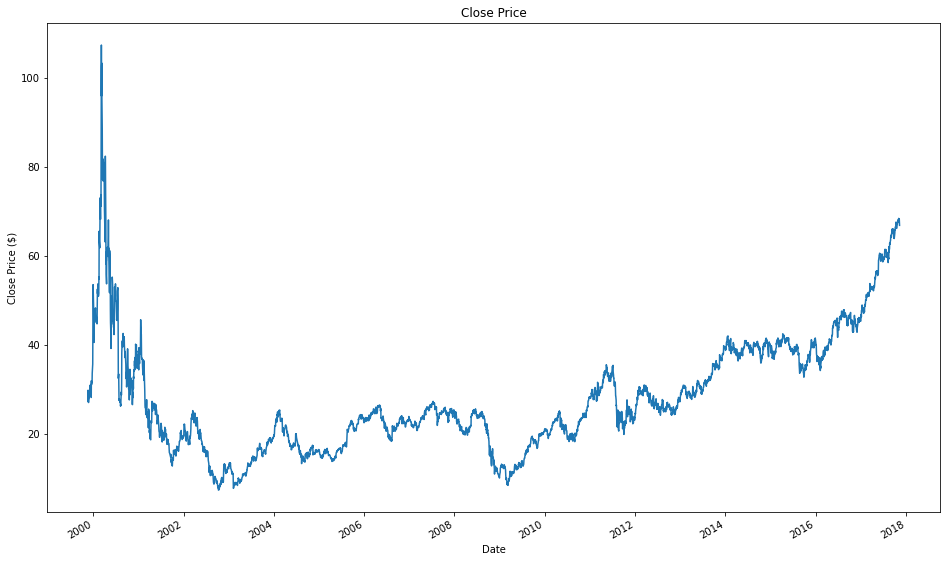

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("a.us.csv")
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
data = data.filter(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])
data.set_index('Date', inplace=True)
data = data.sort_index(ascending=True, axis=0)

# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("a.us.csv")
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
data = data.filter(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])
data.set_index('Date', inplace=True)
data = data.sort_index(ascending=True, axis=0)
data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-11-18,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-19,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-22,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-23,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-24,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-26,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-29,28.375143,29.557143,27.115857,28.231286,1.528648e+07,0.0
1999-11-30,28.037571,28.876000,27.206143,28.056714,6.470717e+06,0.0
1999-12-01,27.965286,28.918429,27.406286,28.303714,4.612264e+06,0.0


<AxesSubplot:xlabel='Date'>

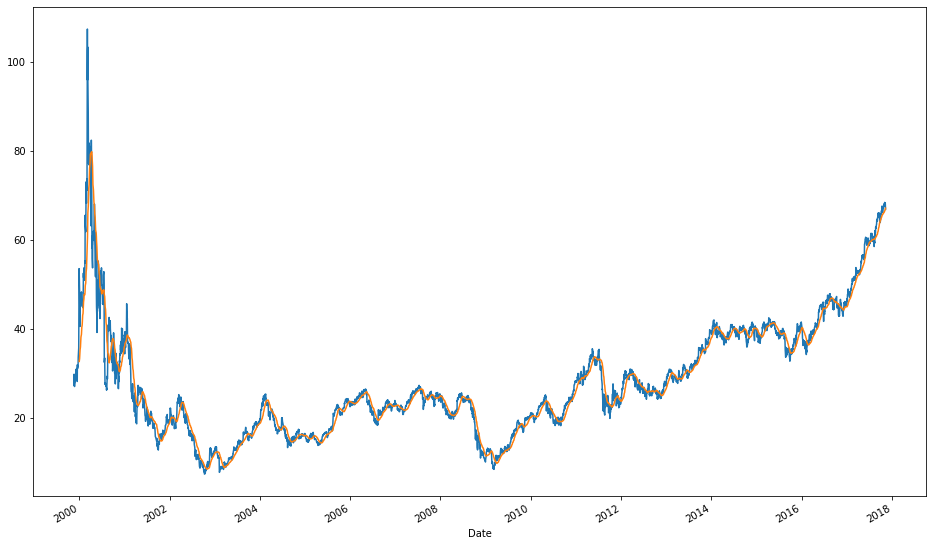

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("a.us.csv")
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
data = data.filter(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])
data.set_index('Date', inplace=True)
data = data.sort_index(ascending=True, axis=0)

# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
data['Close'].plot()

data.rolling(window=30).mean()['Close'].plot()

# 9 Data Preparation for Modelling

In [7]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3616
Number of records in Test Data: 905


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("a.us.csv")
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
data = data.filter(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])
data.set_index('Date', inplace=True)
data = data.sort_index(ascending=True, axis=0)

# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
open_price = data.iloc[start:total_data,0] #open
high = data.iloc[start:total_data,1] #high
low = data.iloc[start:total_data,2] #low
close_price = data.iloc[start:total_data,3] #close
volume = data.iloc[start:total_data,4] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


Date
1999-11-19    27.257
1999-11-22    29.702
1999-11-23    27.002
1999-11-24    27.717
1999-11-26    27.807
               ...  
2017-11-06    68.220
2017-11-07    68.250
2017-11-08    68.110
2017-11-09    67.470
2017-11-10    66.810
Name: Close, Length: 4520, dtype: float64

In [16]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([open_price, high, low, close_price, close_price_shifted, volume], axis=1)

# setting column names of the revised stock data
data.columns = ['open_price', 'high', 'low', 'close_price', 'close_price_shifted', 'volume']

# dropping nulls
data = data.dropna()    
data.head(10)

,open_price,high,low,close_price,close_price_shifted,volume
Date,,,,,,
1999-11-19,28.986,29.027,26.872,27.257,29.702,16142920
1999-11-22,27.886,29.702,27.044,29.702,27.002,6970266
1999-11-23,28.688,29.446,27.002,27.002,27.717,6332082
1999-11-24,27.083,28.309,27.002,27.717,27.807,5132147
1999-11-26,27.594,28.012,27.509,27.807,28.432,1832635
1999-11-29,27.676,28.650,27.380,28.432,28.480,4317826
1999-11-30,28.350,28.986,27.634,28.480,28.986,4567146
1999-12-01,28.480,29.324,28.273,28.986,29.786,3133746
1999-12-02,29.532,30.375,29.155,29.786,30.039,3252997


# 10 Setting the Target Variable and the Feature Dataset

In [17]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
1999-11-19    29.702
1999-11-22    27.002
1999-11-23    27.717
1999-11-24    27.807
1999-11-26    28.432
               ...  
2017-11-03    68.220
2017-11-06    68.250
2017-11-07    68.110
2017-11-08    67.470
2017-11-09    66.810
Name: close_price_shifted, Length: 4519, dtype: float64

In [18]:
# setting the features dataset for prediction 
cols = ['open_price', 'high', 'low', 'close_price', 'volume']
x = data[cols]
x

,open_price,high,low,close_price,volume
Date,,,,,
1999-11-19,28.986,29.027,26.872,27.257,16142920
1999-11-22,27.886,29.702,27.044,29.702,6970266
1999-11-23,28.688,29.446,27.002,27.002,6332082
1999-11-24,27.083,28.309,27.002,27.717,5132147
1999-11-26,27.594,28.012,27.509,27.807,1832635
...,...,...,...,...,...
2017-11-03,68.090,68.670,68.010,68.370,1072288
2017-11-06,68.220,68.450,68.220,68.220,995731
2017-11-07,68.320,68.640,68.040,68.250,966466


# 10.1 Scaling the Target Variable and the Feature Dataset
Stock prices are time series data. We will use LSTM to predict the prices, however since LSTM is very sensitive to the scale of the data, we will need to re-scale the data in a certain range that will apply for all records. The feature range that is used is (-1,1).


In [19]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.55620742, -0.57757856, -0.56419203, -0.60132085, -0.16392568],
        [-0.5786388 , -0.56432457, -0.5604032 , -0.55241899, -0.63899589],
        [-0.56228429, -0.56935127, -0.56132838, -0.60642104, -0.67204873],
        ...,
        [ 0.24589786,  0.20024427,  0.34266002,  0.21857031, -0.94994478],
        [ 0.24141159,  0.19415725,  0.33673447,  0.2157702 , -0.94962626],
        [ 0.237741  ,  0.18728481,  0.31776829,  0.20296971, -0.91334766]]),
 array([[-0.55241899],
        [-0.60642104],
        [-0.5921205 ],
        ...,
        [ 0.2157702 ],
        [ 0.20296971],
        [ 0.18976921]]))

# 10.2 Dividing the dataset into Training and Test
Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In time series data, an observation for a particular date is always dependent on the previous date records.

In [20]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (3616, 5) and y: (3616, 1)
Number of rows and columns in the Test set X: (902, 5) and y: (902, 1)


# 10.3 Reshaping the Feature Dataset

In [21]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3616, 5, 1)
Shape of Test set X: (902, 5, 1)


# 11 Stock Data Modelling

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

ModuleNotFoundError: No module named 'keras'

In [ ]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

# 12 Predictions

In [ ]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

# 13 Model Evaluation

In [ ]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

In [ ]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

In [ ]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

# 14 Plotting the Predictions against unseen data

In [ ]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

In [ ]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()
